<a href="https://colab.research.google.com/github/surajjorwar/Machine-Learning-Tasks-/blob/main/anomaly_detection_using_dbscan_and_IsolationForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math as m
from sklearn.datasets import make_circles



In [3]:
df = pd.read_csv('/content/drive/MyDrive/andrew ng /height and weight/weight-height.csv')

In [4]:
df.drop(columns = ('Gender'),inplace = True )

In [5]:
df.head(4)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  10000 non-null  float64
 1   Weight  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


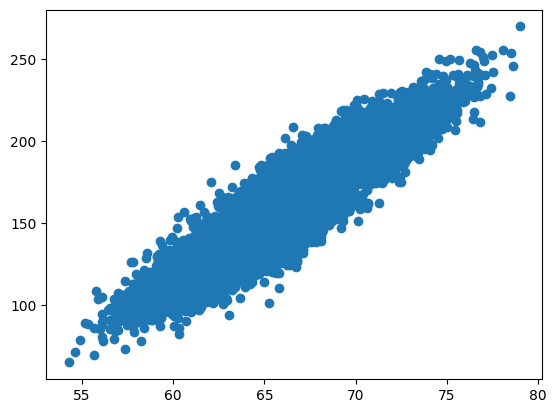

In [7]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [8]:
from sklearn.ensemble import IsolationForest

In [9]:
clf = IsolationForest(contamination=0.1)
clf.fit(df)
prediction = clf.predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [10]:
prediction

array([-1,  1, -1, ...,  1,  1,  1])

In [11]:
X = df.values

In [20]:
index =np.where(prediction < 0)
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.xlabel('height')
plt.ylabel('weight')

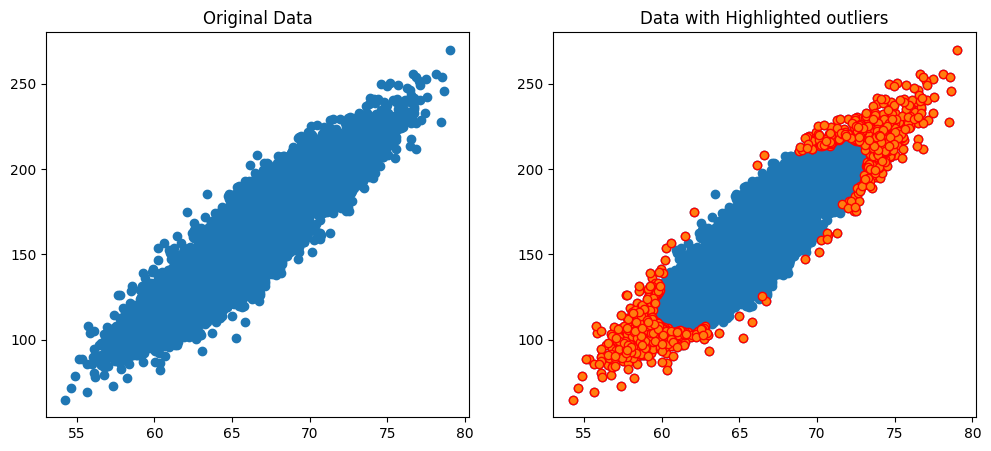

In [24]:
import matplotlib.pyplot as plt

# Create a figure and two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first scatter plot on the first subplot
axs[0].scatter(df.iloc[:, 0], df.iloc[:, 1])
axs[0].set_title('Original Data')

# Plot the second scatter plot on the second subplot
axs[1].scatter(df.iloc[:, 0], df.iloc[:, 1])
axs[1].scatter(X[index, 0], X[index, 1], edgecolors="r")
axs[1].set_title('Data with Highlighted outliers')

# Show the plots
plt.show()


# DBSCAN Clustering

Creating data set for DBSCAN

In [14]:
x,y = make_circles(n_samples=900,factor =0.3,noise = 0.1)

In [15]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.10)
dbscan.fit_predict(x)

array([ 0,  1,  0,  0,  0,  2,  0,  2,  3,  1,  3,  3,  1,  2,  2,  3,  2,
        2,  0,  0,  2,  0,  0,  3,  3,  0,  3,  0, -1,  2,  0, -1,  3,  1,
        0,  2,  3,  3, -1, -1,  3,  1,  1,  3,  2,  3,  3,  2,  3,  0,  3,
        0,  3,  3,  3,  3,  3,  3,  2,  3,  3,  3,  0,  0,  3,  3,  0,  0,
        3,  3,  0,  3,  0,  0,  0,  3,  3,  2,  3,  3,  1,  3,  3,  2,  0,
        2,  3,  3,  2,  3,  0, -1,  2,  3, -1,  0,  3,  0,  2,  2,  2,  3,
        0,  0,  0,  0,  2,  3,  2,  3,  3,  3,  0,  3,  3,  3,  3,  2,  3,
        0,  0,  2,  1,  0,  3,  0,  1,  0,  0,  0,  3,  3,  3,  0,  0,  3,
        0,  3,  2,  3,  0,  3,  1,  0,  0,  3,  3,  3,  2,  2,  3,  1,  3,
        3,  0,  0,  2,  3,  2,  3,  3,  3,  3,  3,  3,  0,  1, -1,  3,  0,
        3,  1,  2,  2,  3,  2,  3,  2,  3, -1,  2,  0,  3,  1,  3,  0,  2,
        2, -1,  0,  3,  3,  3,  3,  3,  1,  2,  3,  3,  3,  3,  3,  3,  3,
        0, -1,  2,  2,  3,  3,  1,  3,  3,  3,  3,  3,  2,  2,  0,  3,  2,
        3,  0,  3,  3,  2

In [16]:
dbscan.labels_

array([ 0,  1,  0,  0,  0,  2,  0,  2,  3,  1,  3,  3,  1,  2,  2,  3,  2,
        2,  0,  0,  2,  0,  0,  3,  3,  0,  3,  0, -1,  2,  0, -1,  3,  1,
        0,  2,  3,  3, -1, -1,  3,  1,  1,  3,  2,  3,  3,  2,  3,  0,  3,
        0,  3,  3,  3,  3,  3,  3,  2,  3,  3,  3,  0,  0,  3,  3,  0,  0,
        3,  3,  0,  3,  0,  0,  0,  3,  3,  2,  3,  3,  1,  3,  3,  2,  0,
        2,  3,  3,  2,  3,  0, -1,  2,  3, -1,  0,  3,  0,  2,  2,  2,  3,
        0,  0,  0,  0,  2,  3,  2,  3,  3,  3,  0,  3,  3,  3,  3,  2,  3,
        0,  0,  2,  1,  0,  3,  0,  1,  0,  0,  0,  3,  3,  3,  0,  0,  3,
        0,  3,  2,  3,  0,  3,  1,  0,  0,  3,  3,  3,  2,  2,  3,  1,  3,
        3,  0,  0,  2,  3,  2,  3,  3,  3,  3,  3,  3,  0,  1, -1,  3,  0,
        3,  1,  2,  2,  3,  2,  3,  2,  3, -1,  2,  0,  3,  1,  3,  0,  2,
        2, -1,  0,  3,  3,  3,  3,  3,  1,  2,  3,  3,  3,  3,  3,  3,  3,
        0, -1,  2,  2,  3,  3,  1,  3,  3,  3,  3,  3,  2,  2,  0,  3,  2,
        3,  0,  3,  3,  2

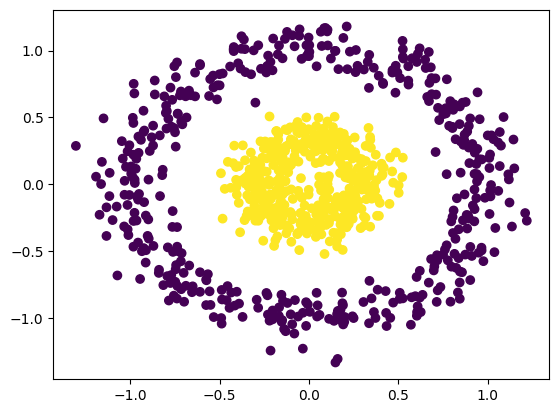

In [17]:
plt.scatter(x[:,0],x[:,1],c=y)


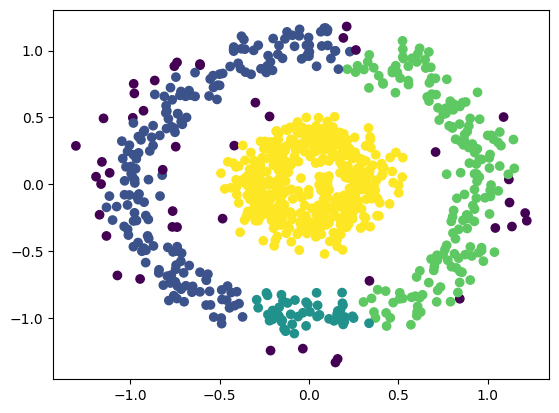

In [18]:
plt.scatter(x[:,0],x[:,1],c = dbscan.labels_)

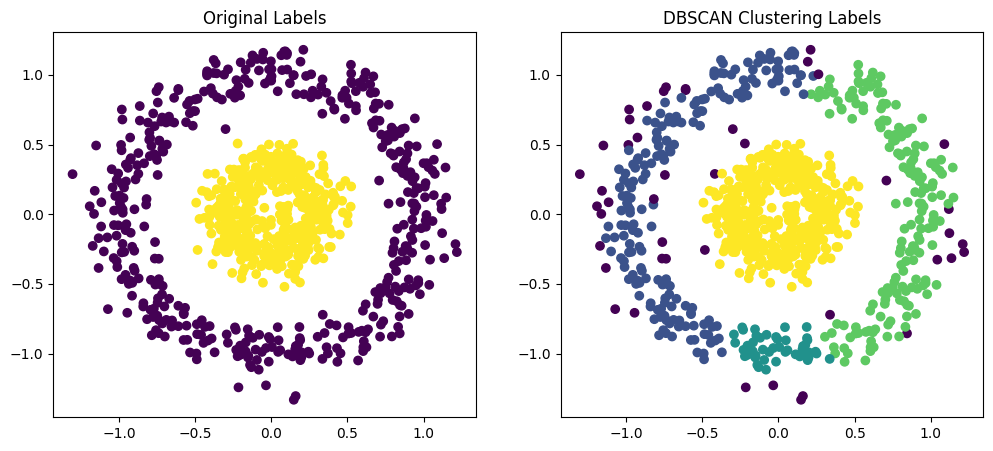

In [26]:
import matplotlib.pyplot as plt

# Create a figure and two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first scatter plot on the first subplot
axs[0].scatter(x[:, 0], x[:, 1], c=y)
axs[0].set_title('Original Labels')

# Plot the second scatter plot on the second subplot
axs[1].scatter(x[:, 0], x[:, 1], c=dbscan.labels_)
axs[1].set_title('DBSCAN Clustering Labels')

# Show the plots
plt.show()


# here voilet colour is the colour of outlier which is detected by dbscan in the 2nd plot